### loading dataset

In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv("Customer Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# statistical summary

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### cleaning Dataset

### replacing the blank values with 0

In [11]:
df['TotalCharges'].replace(' ',0,inplace=True)

/tmp/ipython-input-3618284031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(' ',0,inplace=True)


In [12]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### converted Senior citizen column from 0s and 1s to no/yes

In [14]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [15]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df['customerID'].count()

np.int64(7043)

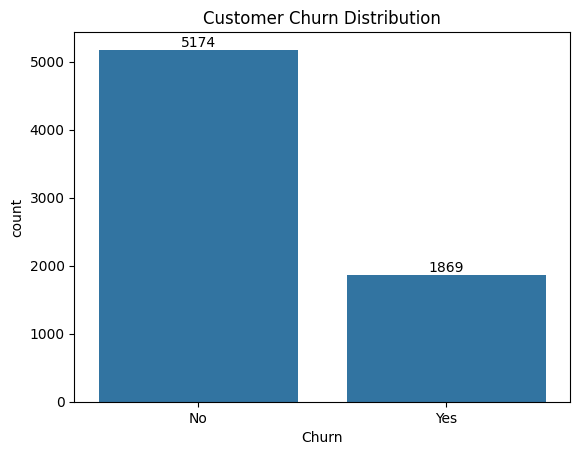

In [94]:
ax=sns.countplot(x=df['Churn'])

for bar in ax.containers:
  ax.bar_label(bar)

plt.title("Customer Churn Distribution")
plt.show()

Text(0.5, 0.98, 'Distribution of Customer Tenure, Monthly Charges, and Total Charges')

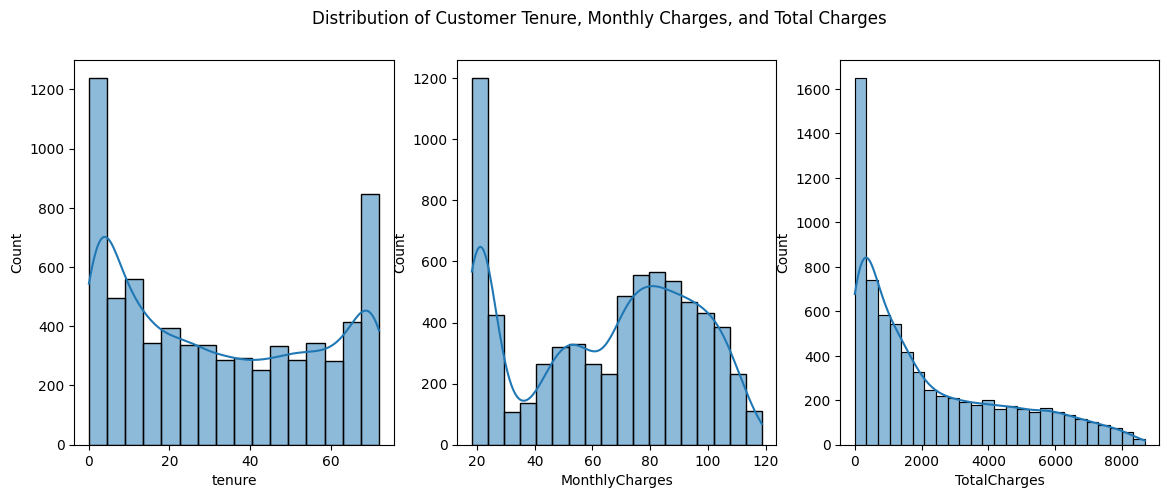

In [92]:
plt.figure(figsize=(14,5))
def plotting(col_name,position):

  plt.subplot(1,3,position)
  sns.histplot(df[col_name],kde=True)


plotting('tenure',1)
plotting('MonthlyCharges',2)
plotting('TotalCharges',3)

plt.suptitle("Distribution of Customer Tenure, Monthly Charges, and Total Charges")

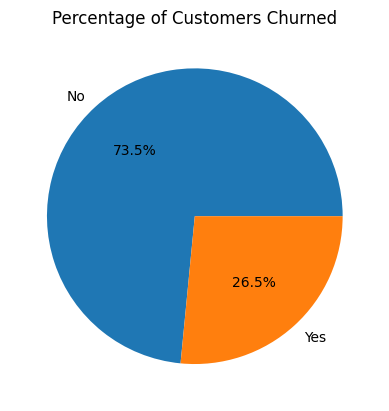

In [20]:
gb1=df.groupby('Churn').agg({"Churn":"count"})

plt.pie(gb1['Churn'], labels=gb1.index, autopct='%1.1f%%')
plt.title("Percentage of Customers Churned")
plt.show()


Text(0.5, 1.0, 'Count of Gender')

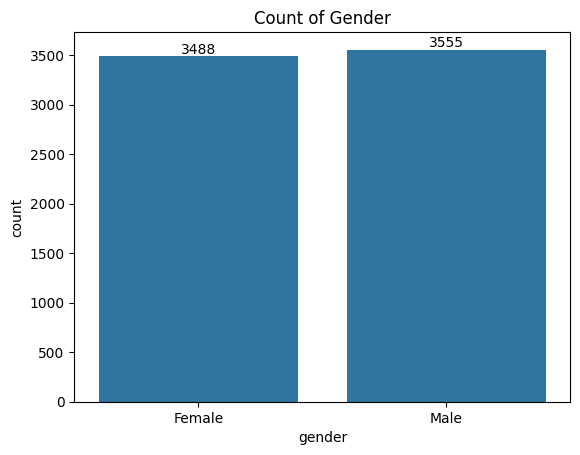

In [21]:
ax=sns.countplot(x=df['gender'])

for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Count of Gender")

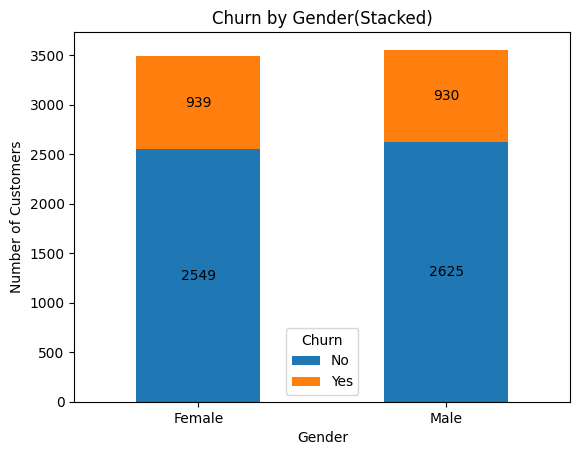

In [22]:

gb2=df.groupby(['gender','Churn']).size().unstack()
ax=gb2.plot(kind='bar',stacked=True)
plt.title('Churn by Gender(Stacked)')
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.legend(title='Churn')
plt.show()

Text(0.5, 1.0, 'Count of Senior Citizen')

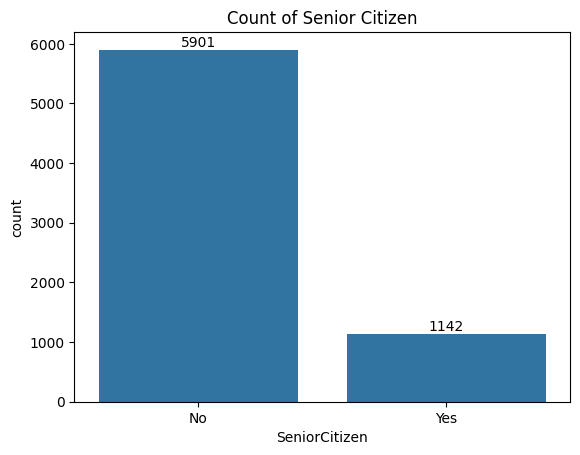

In [23]:
ax=sns.countplot(x=df['SeniorCitizen'])

for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Count of Senior Citizen")

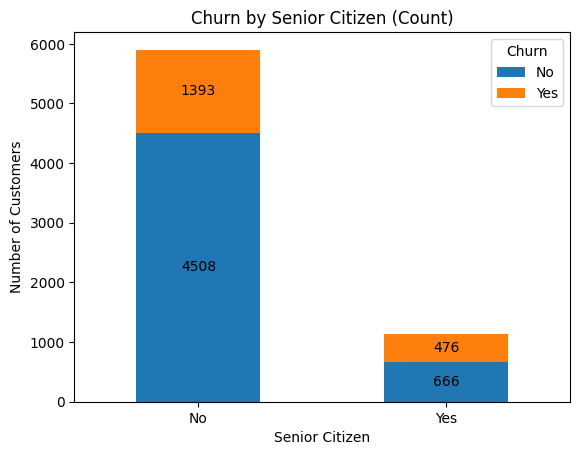

In [28]:
gb = df.groupby(['SeniorCitizen','Churn']).size().unstack()
ax=gb.plot(kind='bar', stacked=True)

plt.title('Churn by Senior Citizen (Count)')
plt.ylabel('Number of Customers')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.legend(title='Churn',bbox_to_anchor=(1.05, 1))
plt.show()

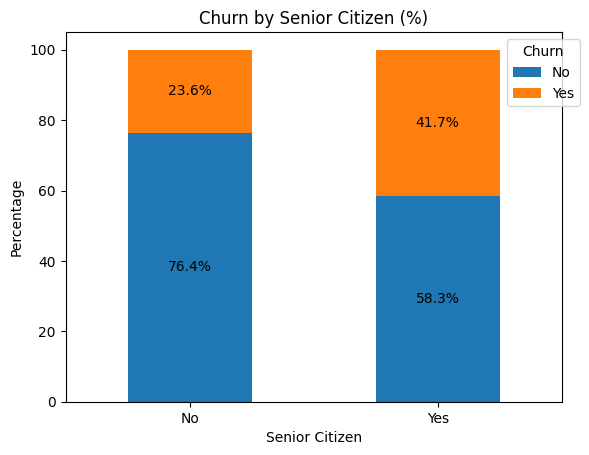

In [30]:
# count customers
gb = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# convert count to percentage
gb = gb.div(gb.sum(axis=1), axis=0) * 100

# plot stacked bar chart
ax = gb.plot(kind='bar', stacked=True)

plt.title('Churn by Senior Citizen (%)')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=0)
plt.legend(title='Churn',bbox_to_anchor=(1.05, 1))

# show percentage on bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.show()


### compartively a greater percentage of people in senior citien category churned out ..

Text(0.5, 1.0, 'Customer Tenure Distribution by Churn Status')

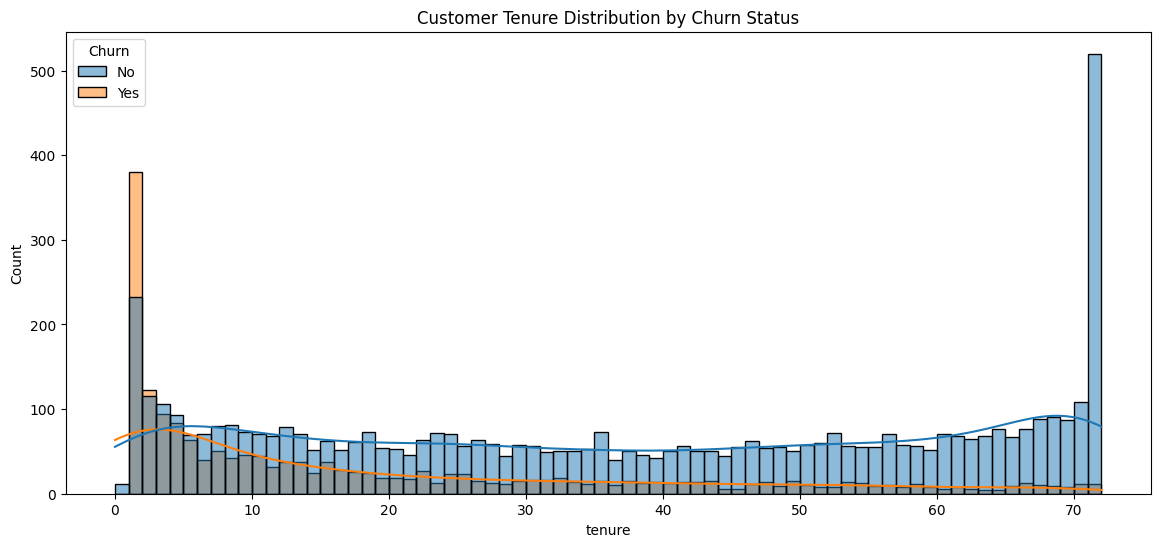

In [91]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='tenure', bins=72, kde=True, hue='Churn')
plt.title("Customer Tenure Distribution by Churn Status")


# people who have used the services for one or two months have churned

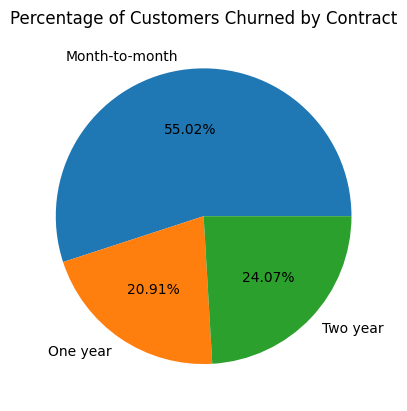

In [55]:
gb3=df.groupby('Contract').agg({'Churn':'count'}).reset_index()

plt.pie(gb3['Churn'],labels=gb3['Contract'],autopct="%1.2f%%")
plt.title("Percentage of Customers Churned by Contract")
plt.show()

Text(0.5, 1.0, 'Count of customers by Contract')

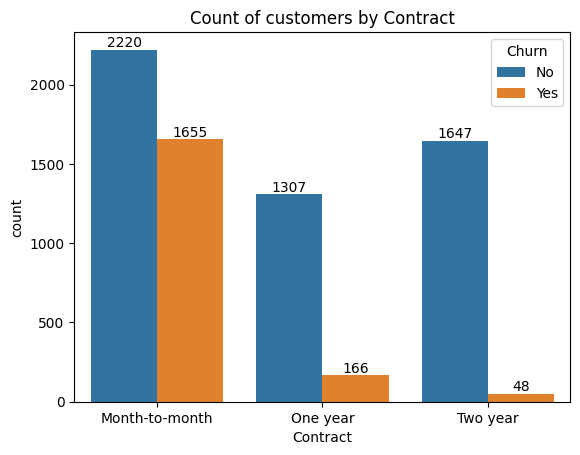

In [63]:
ax=sns.countplot(x='Contract',data=df,hue='Churn');

for bar in ax.containers:
  ax.bar_label(bar)

plt.title("Count of customers by Contract")

### Customers with month-to-month contracts are most likely to leave

In [64]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

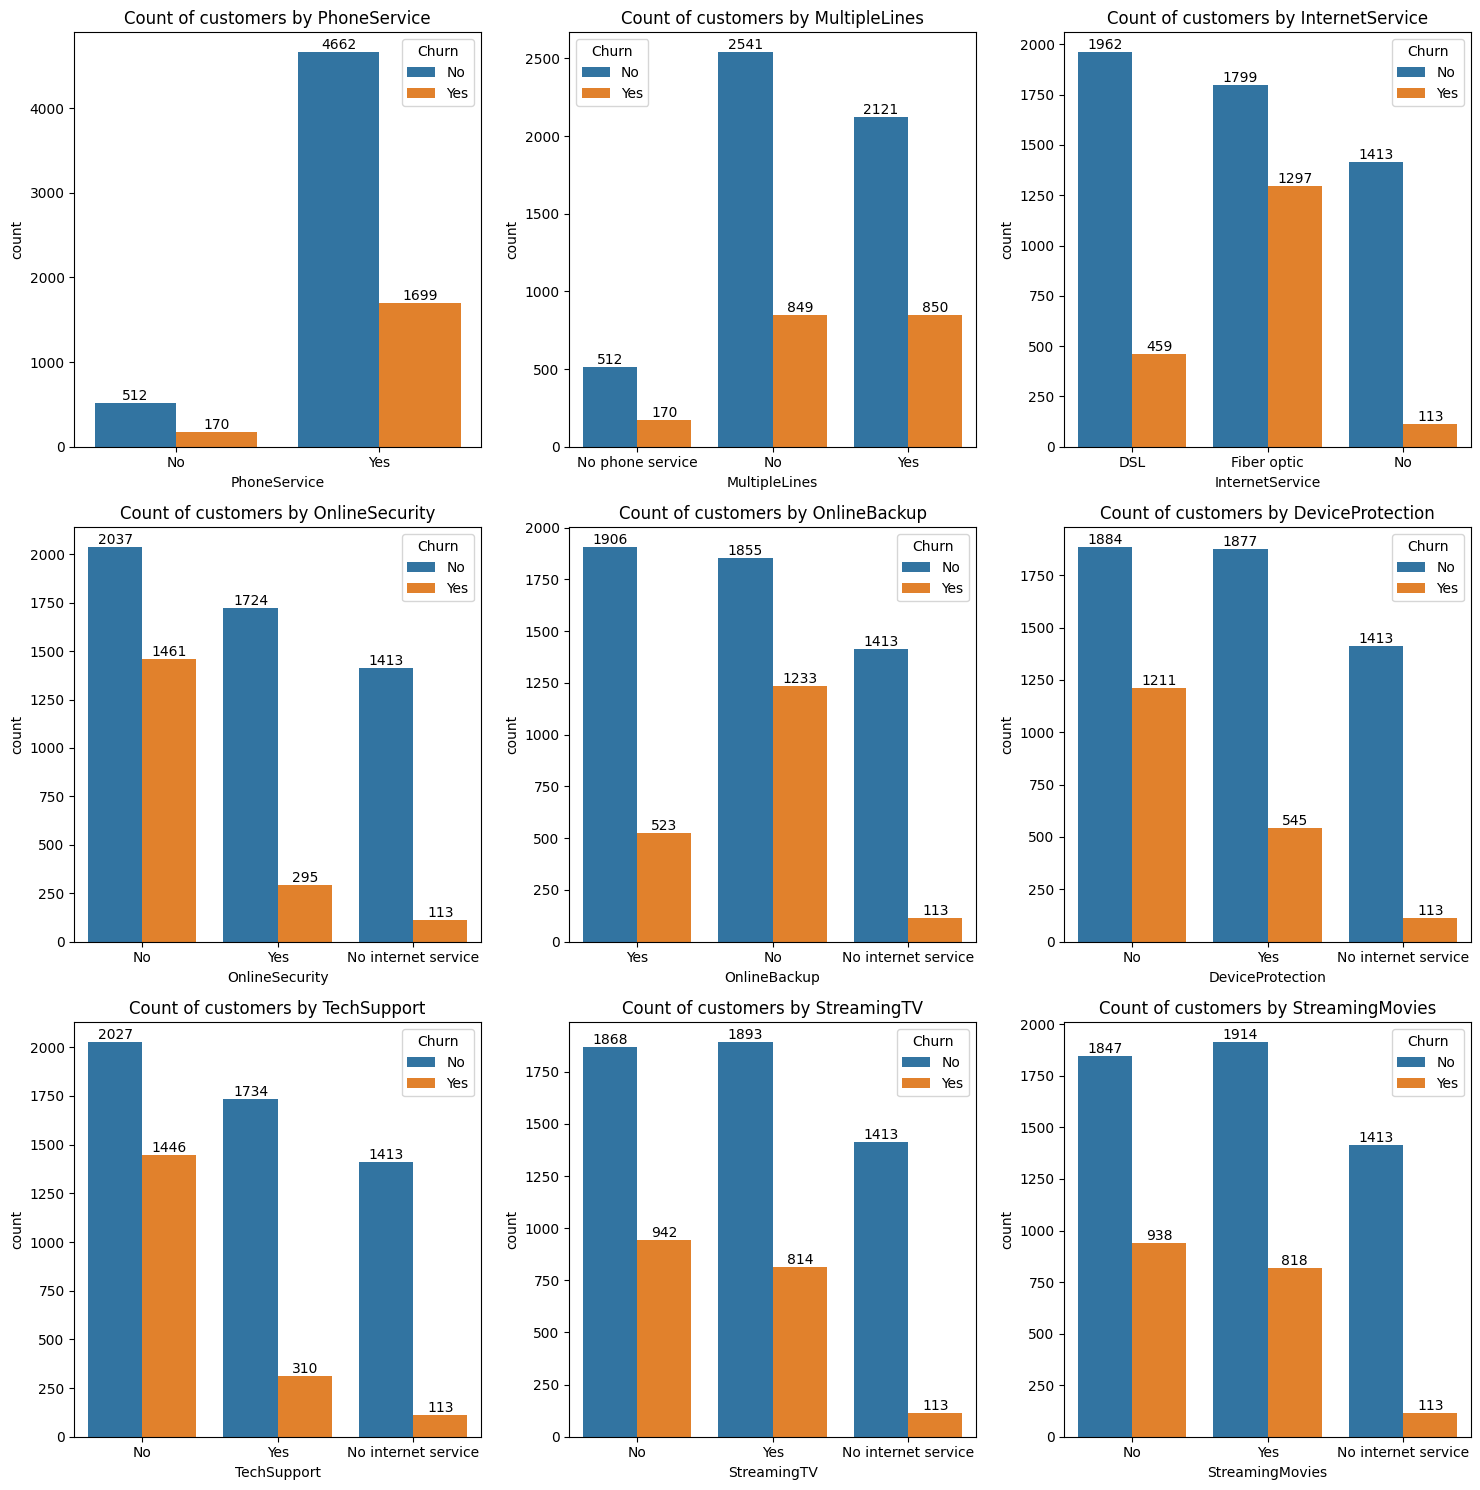

In [75]:
l1=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
def plotting(col_name,position):
  plt.subplot(3,3,position)
  ax=sns.countplot(x=col_name,data=df,hue='Churn')
  for bar in ax.containers:
    ax.bar_label(bar)
  plt.title(f"Count of customers by {col_name}")

plt.figure(figsize=(15,15))
count=0
for i in l1:
  count+=1
  plotting(i,count)

plt.tight_layout()
plt.show()

### Customers without add-on services like OnlineSecurity, TechSupport, and DeviceProtection show significantly higher churn, while those who subscribe to these services tend to stay longer. Fiber optic internet users churn more compared to DSL users, and customers with no internet service have the lowest churn. Overall, value-added services play a key role in reducing customer churn.

In [78]:
df.groupby("PaymentMethod").agg({"Churn":"count"}).reset_index().sort_values(by='Churn',ascending=False)

,PaymentMethod,Churn
2,Electronic check,2365
3,Mailed check,1612
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522


Text(0.5, 1.0, 'Customer Distribution by Payment Method')

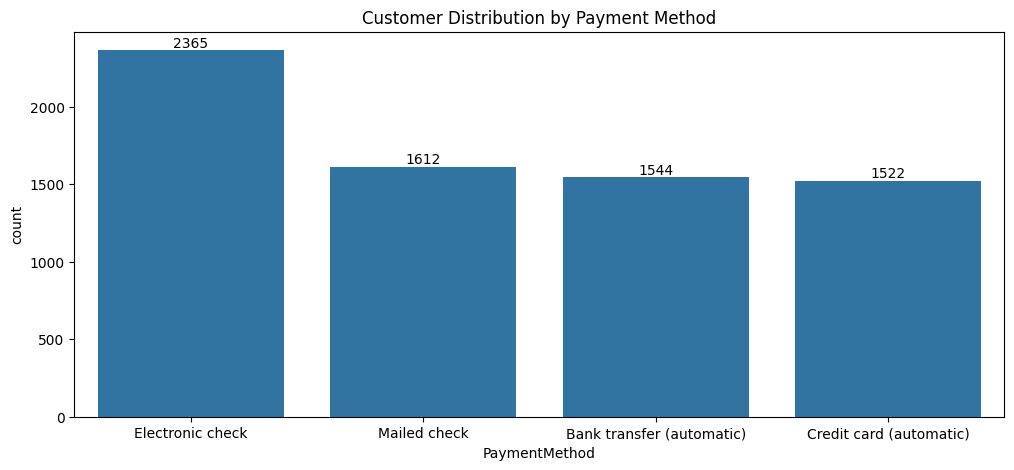

In [88]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='PaymentMethod',data=df)

for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Customer Distribution by Payment Method")


Text(0.5, 1.0, "Churned customers by 'PaymentMethod'")

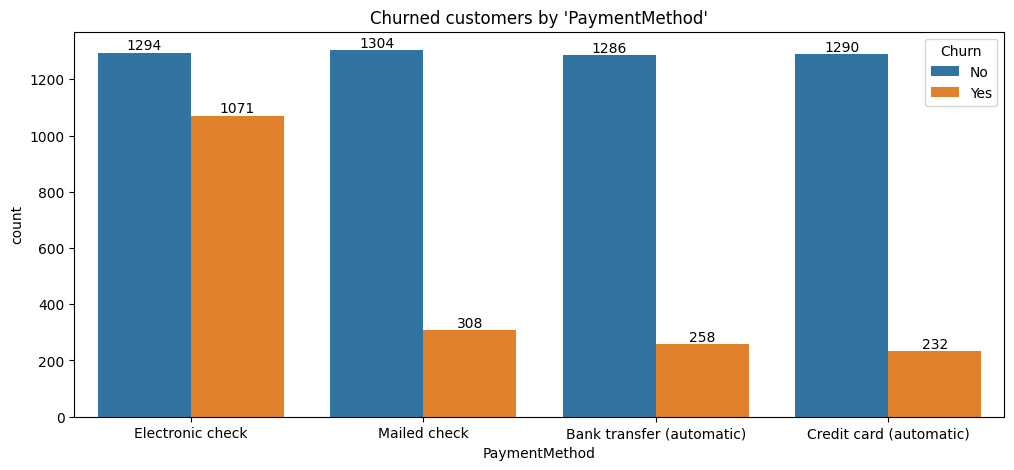

In [90]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn');

for bar in ax.containers:
  ax.bar_label(bar)

plt.title("Churned customers by 'PaymentMethod'")

### customer is likely to churn when he is using electronic mail


### 📌 Overall Business Summary

The analysis shows that customer churn is strongly influenced by tenure, contract type, service usage, and payment method.

Customers in their first 1–2 months are the most likely to leave, highlighting the importance of early engagement and onboarding.

Month-to-month contract users churn significantly more than customers on one-year or two-year contracts, indicating that long-term plans improve retention.

Customers who do not use add-on services such as Online Security, Tech Support, and Backup have a higher tendency to churn, suggesting these services increase customer stickiness.

Senior citizens show a comparatively higher churn rate and may require targeted support and customized plans.

The Electronic Check payment method is associated with the highest churn, which may indicate trust, convenience, or user-experience issues.

Customers with short tenure and moderate to high monthly charges are more sensitive to churn, possibly due to perceived lack of value.

### ✅ Business Recommendations

Strengthen first-month customer experience with better onboarding and engagement campaigns.

Promote long-term contracts through discounts or loyalty benefits.

Bundle and upsell security and support services to increase retention.

Design special plans or assistance programs for senior customers.

Improve or incentivize alternative payment methods over electronic checks.